In [1]:
import numpy as np
import pandas as pd
import scipy.stats
from scipy.stats import norm
from scipy.stats import lognorm
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Duplicate key in file PosixPath('/opt/conda/lib/python3.8/site-packages/matplotlib/mpl-data/matplotlibrc'), line 758 ('font.family : IPAexGothic')


/opt/conda/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

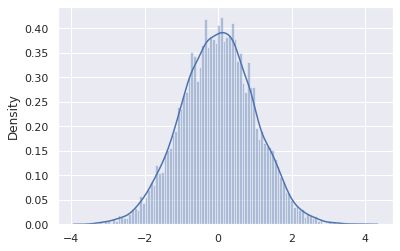

In [2]:
sns.set()
y = np.random.normal(0,1,10000)
y = pd.DataFrame(y)
sns.distplot(y, bins=100) #分布をグラフ化

/opt/conda/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


[(0.0, 14.0)]

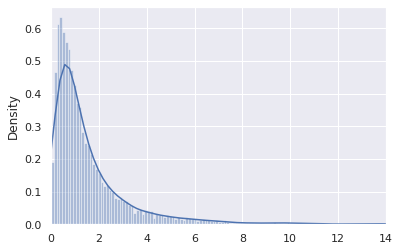

In [3]:
sns.set()
y = np.random.lognormal(0,1,10000)
y = pd.DataFrame(y)
ax = sns.distplot(y, bins=330) #分布をグラフ化
ax.set(xlim=(0,14))

/opt/conda/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

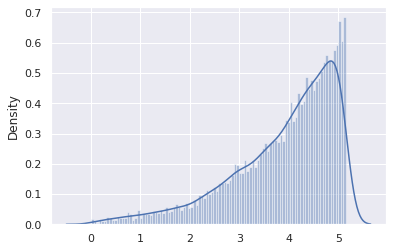

In [4]:
sns.set()
uni = np.random.uniform(0,1,10000) # (0,1)の一様乱数を10,000個生成
x = 100 * (np.exp(uni)-1)+1 #x_iを算出
x = pd.DataFrame(x)

y = np.log(x) #xを対数変換
y = pd.DataFrame(y)
sns.distplot(y, bins=100) #分布をグラフ化

## 分散のみ変化させる正規分布gif画像作成

MovieWriter imagemagick unavailable; using Pillow instead.


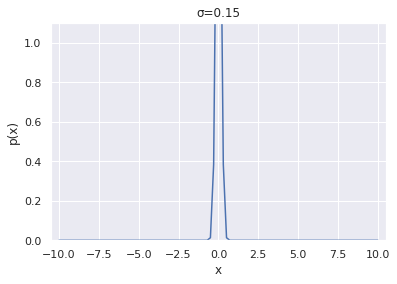

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from IPython.display import HTML
from scipy.stats import norm
from scipy import stats
import seaborn as sns

sns.set()
sns.set_style('darkgrid')

fig, ax = plt.subplots()

def update(num,x,y,scales,lines):
    if len(lines) > 0:
        lines.pop().remove()
    y_ =norm.pdf(x,loc=0,scale=scales[num])
    line, = ax.plot(x, y_,c="b")
    lines.append(line)
    sig = 'σ='
    ax.set_title(sig + str(scales[num])[:4])

ax.set_xlim(-10.5, 10.5)
ax.set_ylim(0, 1.1)
ax.set_xlabel('x')
ax.set_ylabel('p(x)')

x = np.linspace(-10,10,100)
y= norm.pdf(x,loc=0,scale=1)
scales = np.linspace(0.05, 5.0, 100)
theta= np.linspace(np.pi/101, 100/101*np.pi, 100)
scales = 5*np.sin(theta)

lines = []

ani = animation.FuncAnimation(fig, update, 100, fargs=(x,y,scales,lines), interval=100)
dpi=100
ani.save('normal_dist.gif', writer="imagemagick")

## $ \chi^2 $ 分布

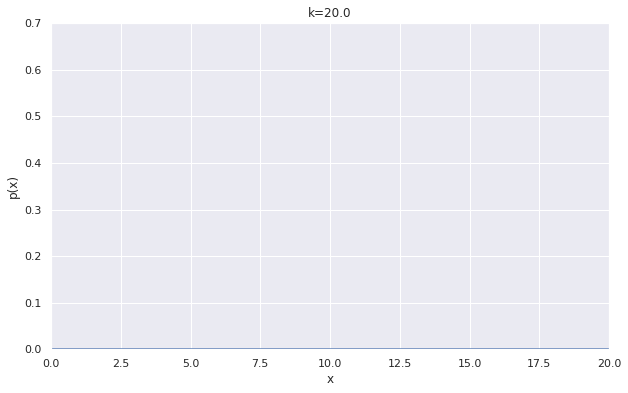

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from IPython.display import HTML
from scipy.stats import norm
from scipy import stats
import seaborn as sns

sns.set()
sns.set_style('darkgrid')

fig, ax = plt.subplots(figsize = (10, 6))
# fig = plt.figure()

def update(num,x,y,scales,lines):
    if len(lines) > 0:
        lines.pop().remove()
    y_ = stats.chi2.pdf(x, num, scale=scales[num])
#     ax.plot(x, stats.chi2.pdf(x, k), label=r'$k=%i$' % k)
    line, = ax.plot(x, y_,c="b", label=r'$k=%i$' % num)
    lines.append(line)
    sig = 'k='
    ax.set_title(sig + str(scales[num])[:4])

ax.set_xlim(0, 20)
ax.set_ylim(0, 0.7)
ax.set_xlabel('x')
ax.set_ylabel('p(x)')

x = np.linspace(0,21,100)
y= norm.pdf(x,loc=0,scale=1)
scales = np.linspace(1, 20, 20)

lines = []

ani = animation.FuncAnimation(fig, update, fargs=(x,y,scales,lines), interval=100, frames=20)

dpi=100
ani.save('chi2_dist.gif', writer="pillow")

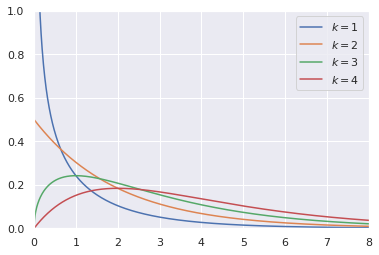

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
x = np.linspace(0, 8, 1000)
fig,ax = plt.subplots(1,1)
 
linestyles = [':', '--', '-.', '-']
deg_of_freedom = [1, 2, 3, 4]
for k in deg_of_freedom:
  ax.plot(x, stats.chi2.pdf(x, k), label=r'$k=%i$' % k)
 
plt.xlim(0, 8)
plt.ylim(0, 1.0)
 
plt.legend()
plt.show()

## $F$ 分布

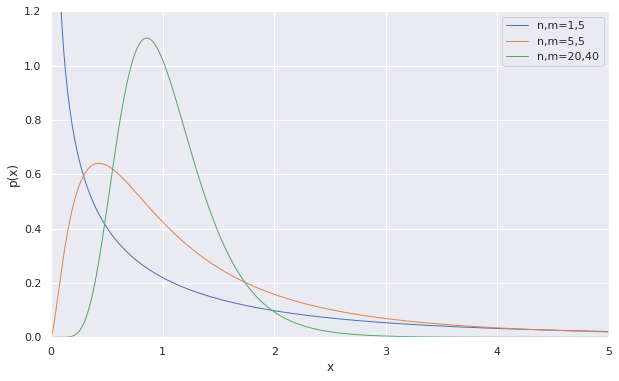

In [8]:
import math
import random
import numpy as np
from scipy.stats import f
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize = (10, 6))
df = [[1,5],[5,5],[20,40]]

xaxis = np.arange(0, 5, 0.01)

for x in df:
    n = x[0]
    m = x[1]
    fpdf = f.pdf(xaxis,n,m)
    plt.plot(xaxis,fpdf,'-', linewidth=1.0, label="n,m="+str(n)+","+str(m))

plt.xlim(0,5)
plt.ylim(0,1.2)
plt.legend()
plt.xlabel('x')
plt.ylabel('p(x)')
plt.grid(True)
plt.show()